# Traffic Analysis on Sao Paulo Brazil data set

Dataset:
Traffic Data collected between 7:00 and 20:00 every 30 minutes for 5 days in the city of São Paulo, Brazil. Recording the time, identified incidents and the slowness in traffic recorded.

Note: 
Due to the fact that the database has few records, the results are subject to chance. However, it is possible to stipulate some findings

In [1]:
# =====   Importing Libraries   ===== #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Data Analysis

In [2]:
# Reading the file
# Path of dataset to be inserted here
base = pd.read_csv(r'C:\Users\dheer\Desktop\DS Assignment\Dataset\traffic.csv', sep=";")

attributes = base.columns.tolist()
del(attributes[len(attributes)-1], attributes[0])

base.insert(0, 'Day', np.repeat([1,2,3,4,5],27))

dict_hours = {1: "7:00", 2: "7:30", 3: "8:00", 4: "8:30", 5: "9:00", 6: "9:30", 7: "10:00", 8: "10:30",
                 9: "11:00", 10: "11:30", 11: "12:00", 12: "12:30", 13: "13:00", 14: "13:30", 15: "14:00",
                 16: "14:30", 17: "15:00", 18: "15:30", 19: "16:00", 20: "16:30", 21: "17:00", 22: "17:30",
                 23: "18:00", 24: "18:30", 25: "19:00", 26: "19:30", 27: "20:00"}


In [3]:
#Total of each incident
summation = []
for i in range(len(attributes)):
    summation.append(base[attributes[i]].sum())
    
# Total of each incident per day
nday = 5
day_summary = pd.DataFrame(columns=attributes)
day_summary.insert(0, "Day", "Nan")

for n in range(1, nday+1):
    day_sum = []
    for i in range(len(attributes)):
        day_sum.append(base[attributes[i]].loc[base.Day == n].sum())
    df = pd.DataFrame([day_sum], columns=attributes)
    df.insert(0, "Day", n)
    day_summary = day_summary.append(df, ignore_index=True)

In [4]:
day_summary

,Day,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
0,1,3,8,0,3,1,0,0,0,0,0,0,0,0,1,0,0
1,2,14,26,0,14,2,1,0,0,1,0,0,0,3,1,1,0
2,3,8,32,1,17,3,0,0,0,12,1,6,1,2,1,9,1
3,4,11,26,0,7,5,0,1,1,2,0,10,5,9,2,2,1
4,5,10,26,3,16,5,0,0,0,1,0,0,1,17,1,5,0


Checking the time at which the traffic is slowest

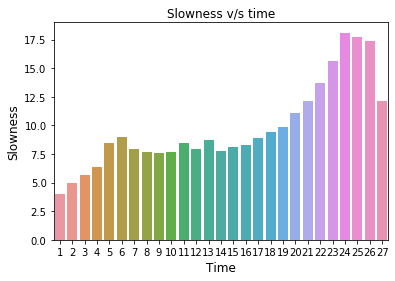

In [5]:
groupByHour = base.groupby(['Hour (Coded)'])

# Create dataframe with average values grouped by time
traffic_Hour = pd.DataFrame(groupByHour['Slowness in traffic (%)'].median().reset_index(name = 'Slowness in traffic (%)'))

sns.barplot(x="Hour (Coded)", y="Slowness in traffic (%)", data=traffic_Hour);

plt.title('Slowness v/s time')
plt.ylabel('Slowness', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.show()

It can be clearly seen from graph that Traffic is slower at the end of the day, from 6 pm to 7:30 pm

Checking the factors that cause the most slowness

In [6]:
data = base
data['Slowness in traffic (%)'] = data['Slowness in traffic (%)'].astype(float)
data = data.sort_values(by='Slowness in traffic (%)')[-20:]
#Remove time column and column with slowness percentage
dataProcess = data.drop(data.columns[[0, 17]], axis=1)

In [7]:
# Function to sum the occurrence number for each incident type
def createDataFrame (dt):
    values = []
    keysWithValues = []
    keys = dt.keys()
    
    for i in range(0, len(keys)):
        value = dt[keys[i]].sum()
        if (value > 0):
            values.append(value)
            keysWithValues.append(keys[i])
    return (keysWithValues, values)

In [8]:
keys, values = createDataFrame(dataProcess)
df = pd.DataFrame([values], columns=keys)

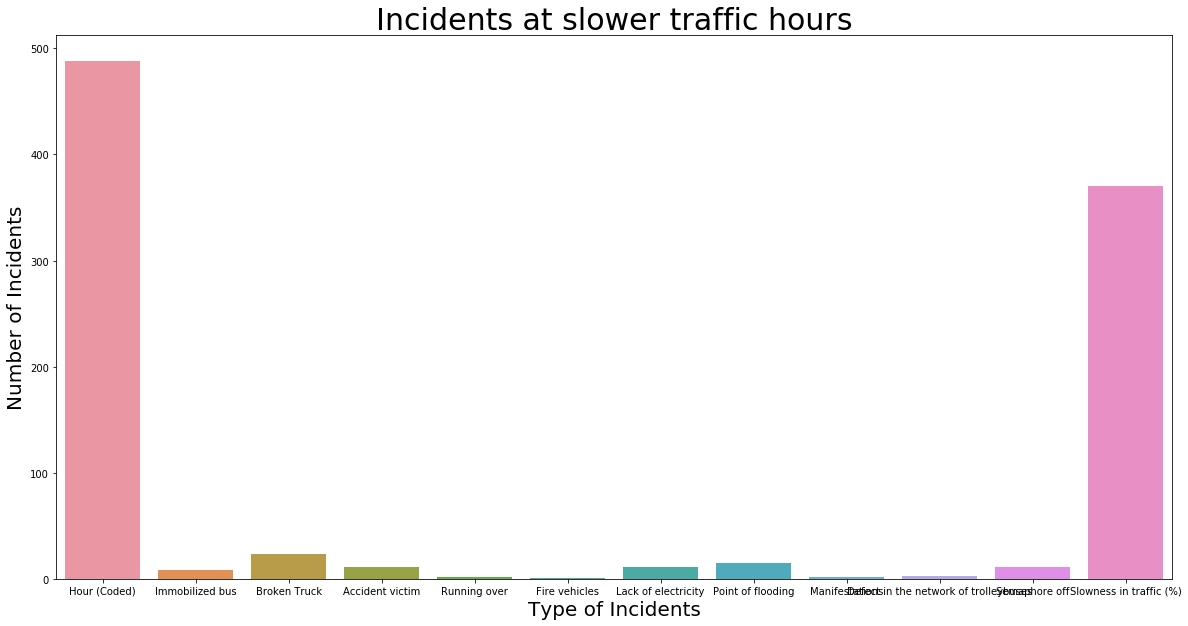

In [9]:
plt.figure(figsize=(20,10))

sns.barplot(data=df);

plt.title('Incidents at slower traffic hours', fontsize=30)
plt.ylabel('Number of Incidents', fontsize=20)
plt.xlabel('Type of Incidents', fontsize=20)
plt.show()

In [10]:
# Graph plot for incident amount per day
def plot_graph(day, data):
    if day == 0:
        plt.barh(attributes, data, color='orange')
        plt.title("Total")
    else:
        plt.barh(attributes, data.loc[data.Day == day].values[0][1:])
        plt.title("Day {}".format(day))
    plt.grid(axis='x', linewidth='0.5')

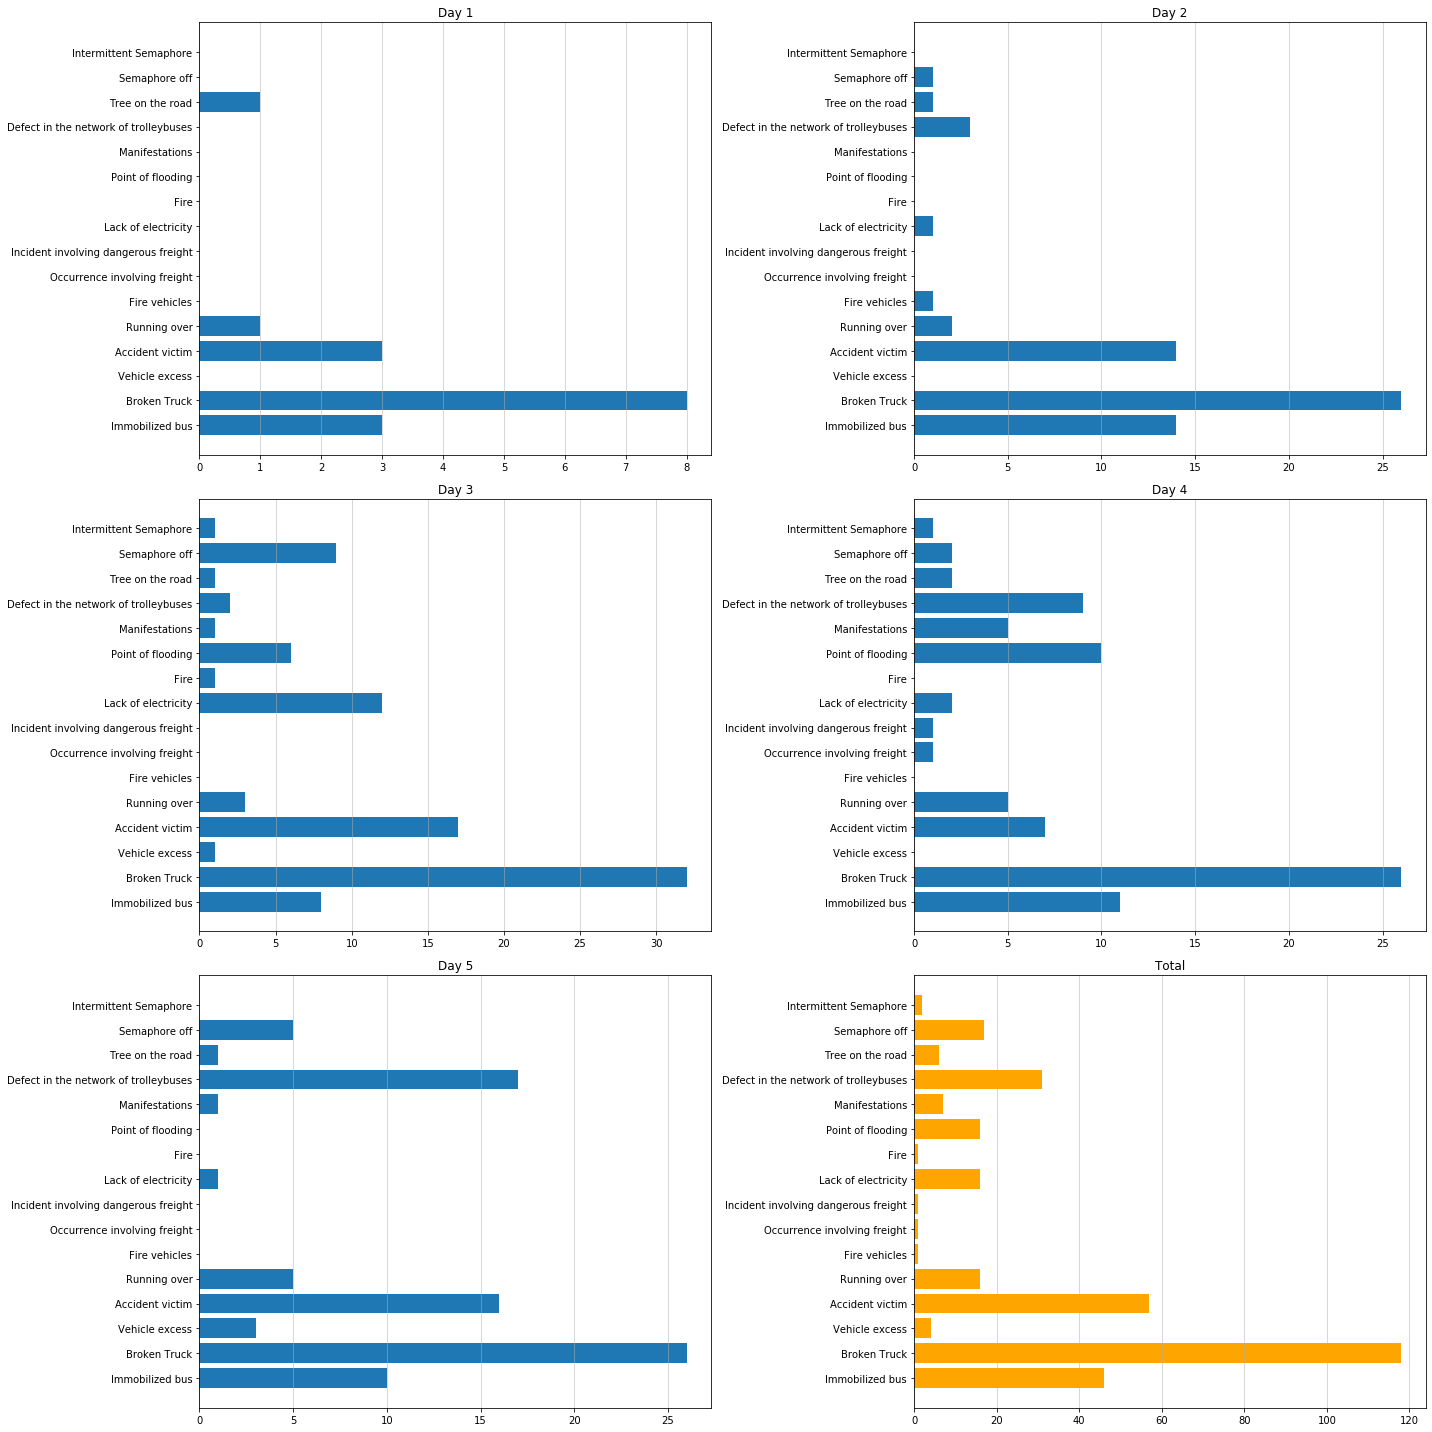

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plot_graph(1, day_summary)
plt.subplot(3,2,2)
plot_graph(2, day_summary)
plt.subplot(3,2,3)
plot_graph(3, day_summary)
plt.subplot(3,2,4)
plot_graph(4, day_summary)
plt.subplot(3,2,5)
plot_graph(5, day_summary)
plt.subplot(3,2,6)
plot_graph(0, summation)

plt.tight_layout()

In [13]:
# ===== Analysis of the Time and slowness in Traffic ===== #
Incident_base = base.iloc[:]
for n in range(len(Incident_base)-1, -1, -1):
    if Incident_base.iloc[n, 2:18].values.sum() != 0:
        Incident_base.drop(n, inplace=True)

average_time = []
average_incidents = []
for n in range(1, 28):
    average_time.append(base["Slowness in traffic (%)"].loc[base["Hour (Coded)"] == n].mean())
    average_incidents.append(Incident_base["Slowness in traffic (%)"].loc[Incident_base["Hour (Coded)"] == n].mean())

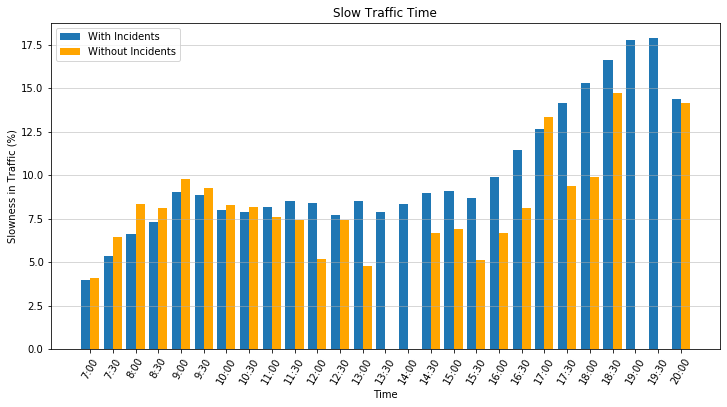

In [14]:
plt.figure(figsize=(12,6))
plt.bar(base["Hour (Coded)"].unique(), average_time,
             label="With Incidents", width=0.4, align="center")
plt.bar(base["Hour (Coded)"].unique()+0.4, average_incidents,
             label="Without Incidents", color="orange", width=0.4)
plt.legend()
plt.title("Slow Traffic Time")
plt.xlabel("Time")
plt.ylabel("Slowness in Traffic (%)")
plt.xticks(base["Hour (Coded)"].unique()+0.2, dict_hours.values(), rotation=60)
plt.grid(axis='y', linewidth="0.5")

In [15]:
# ===== Incident Time Analysis ===== #
incident_time = base.groupby("Hour (Coded)").mean()
incident_sum = base.groupby("Hour (Coded)").sum()
time_slowness = incident_time["Slowness in traffic (%)"]

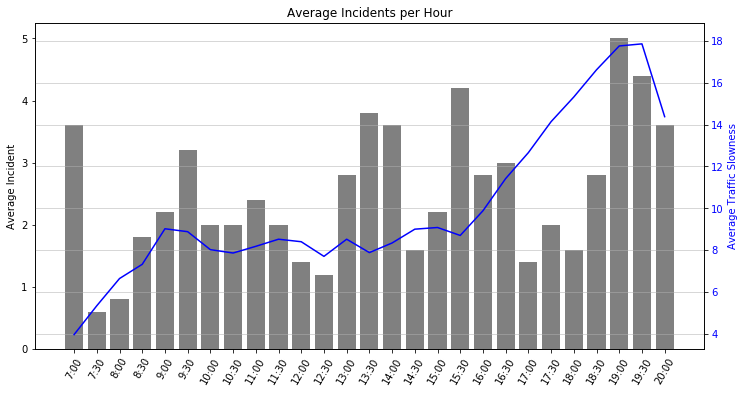

In [16]:
fig, ax1 = plt.subplots(figsize=(12,6))
for n in range(len(dict_hours)):
    ax1.bar(dict_hours[n+1], incident_time.iloc[n, 1:17].sum(), color="grey")
ax1.set_ylabel('Average Incident')
ax2 = ax1.twinx()
ax2.plot(list(dict_hours.values()), time_slowness, color='b')
plt.ylim(top=max(time_slowness)+1)
ax2.set_ylabel('Average Traffic Slowness', color='b')
for lb in ax2.get_yticklabels():
    lb.set_color('b')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.title("Average Incidents per Hour")
plt.grid(axis='y', linewidth="0.5")

In [17]:
# Plots the amount of a given incident per time
def plot_incident(incident):
    incid = incident_sum[incident]
    
    plt.figure(figsize=(12,5))
    for n in range(len(dict_hours)):
        plt.bar(dict_hours[n+1],  incid[n+1], color="grey")
    plt.xticks(rotation=60)
    plt.yticks(list(range(min(incid), max(incid)+1)))
    plt.grid(axis='y', linewidth="0.5")
    plt.title("Number of incidents per hour".format(incident))

 Incident Options:
 Immobilized bus
 Broken Truck
 Vehicle excess
 Accident victim
 Running over
 Fire vehicles
 Occurrence involving freight
 Incident involving dangerous freight
 Lack of electricity
 Fire
 Point of flooding
 Manifestations
 Defect in the network of trolleybuses
 Tree on the road
 Semaphore off
 Intermittent Semaphore


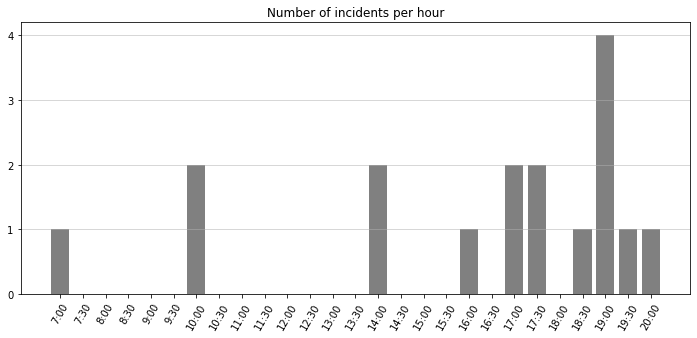

In [18]:
print(" Incident Options:", *attributes, sep='\n ')
plot_incident("Semaphore off")

In [19]:
# Plots the number of all Incidents in a given Time
def plot_hour(hour):
    for k, v in dict_hours.items():
        if v == hour:
            h = k
    plt.figure(figsize=(12,5))
    plt.barh(attributes, incident_sum.iloc[h-1, 1:17].values, color="grey")
    plt.xlabel("Number of Incidents")
    plt.title("Hour {}".format(hour))
    plt.grid(axis='x', linewidth="0.5")

Time Options:	7:00	7:30	8:00	8:30	9:00	9:30	10:00	10:30	11:00	11:30	12:00	12:30	13:00	13:30	14:00	14:30	15:00	15:30	16:00	16:30	17:00	17:30	18:00	18:30	19:00	19:30	20:00


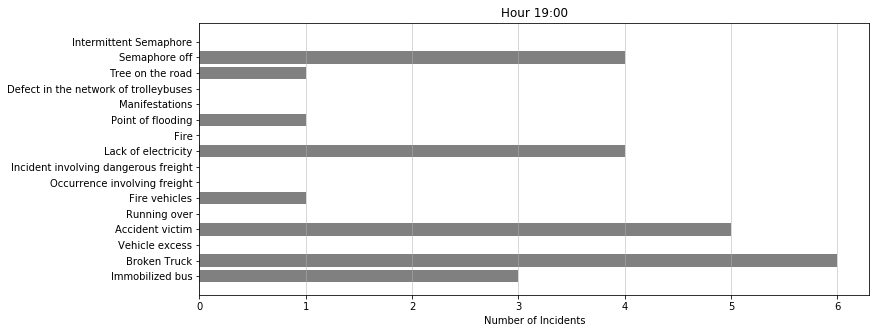

In [20]:
print("Time Options:", *dict_hours.values(), sep='\t')
plot_hour("19:00")

# Predection

Linear Regression

In [22]:
#Data Preperation

x=[i for i in base]
x[0]="Hour"
AVG=base[x[-1]].mean()
base=base.replace(to_replace = np.nan, value =AVG) 
base.columns=x
resultColumn=base[x[-1]]
base=base.drop(x[-1],axis=1)
dummy=pd.get_dummies(base.Hour)
merge=pd.concat([base,dummy],axis=1)
base=merge.drop("Hour",axis=1)

for i in base:
    if base[i].mean()<=0.2:
        base=base.drop(i,axis=1)
        
#Normalization        
minmax = MinMaxScaler()
base[[i for i in base]] = minmax.fit_transform(base[[i for i in base]])


base=pd.concat([base,resultColumn],axis=1)

In [23]:
#Training and testing Split
x = base.iloc[:, :-1].values
y = base.iloc[:, -1].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size  = 4/5,shuffle=False )

In [24]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
yPrediction = linearRegressor.predict(xTest)

for i in range(27):
     print("○ Predicted Value: ","{0:.4f}".format(yPrediction[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  5.6000 | Actual Value:  3.4000
○ Predicted Value:  5.0215 | Actual Value:  5.0000
○ Predicted Value:  5.2271 | Actual Value:  5.5000
○ Predicted Value:  6.0131 | Actual Value:  6.4000
○ Predicted Value:  6.3308 | Actual Value:  8.2000
○ Predicted Value:  7.1757 | Actual Value:  9.0000
○ Predicted Value:  6.7754 | Actual Value:  10.1000
○ Predicted Value:  7.0417 | Actual Value:  10.3000
○ Predicted Value:  7.6166 | Actual Value:  10.9000
○ Predicted Value:  8.0539 | Actual Value:  12.3000
○ Predicted Value:  8.4243 | Actual Value:  11.9000
○ Predicted Value:  9.6720 | Actual Value:  10.3000
○ Predicted Value:  9.4302 | Actual Value:  11.0000
○ Predicted Value:  9.8341 | Actual Value:  9.7000
○ Predicted Value:  10.4218 | Actual Value:  10.3000
○ Predicted Value:  10.3395 | Actual Value:  10.9000
○ Predicted Value:  10.7098 | Actual Value:  8.9000
○ Predicted Value:  11.9240 | Actual Value:  9.4000
○ Predicted Value:  11.5510 | Actual Value:  11.3000
○ Predicted Valu

In [25]:
#Error Calculation
error=0
for i in range(len(yPrediction)):
    error+=pow(yPrediction[i]-yTest[i],2)
error=error/27
print("○ MSE Error-->","{0:.4f}".format(error))

○ MSE Error--> 6.7291


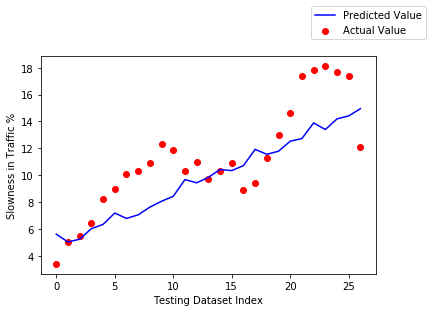

In [26]:
assume=[i for i in range(27)]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, yPrediction, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()

Polynomial Regression

In [31]:
poly=PolynomialFeatures(degree=11)
poly_x=poly.fit_transform(x)

regressor=LinearRegression()
regressor.fit(poly_x,y)
z=regressor.predict(poly.fit_transform(xTest))


for i in range(27):
     print("○ Predicted Value: ","{0:.4f}".format(z[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  3.4000 | Actual Value:  3.4000
○ Predicted Value:  5.0000 | Actual Value:  5.0000
○ Predicted Value:  5.5000 | Actual Value:  5.5000
○ Predicted Value:  6.4000 | Actual Value:  6.4000
○ Predicted Value:  8.2000 | Actual Value:  8.2000
○ Predicted Value:  9.0000 | Actual Value:  9.0000
○ Predicted Value:  10.1000 | Actual Value:  10.1000
○ Predicted Value:  10.3000 | Actual Value:  10.3000
○ Predicted Value:  10.9000 | Actual Value:  10.9000
○ Predicted Value:  10.0000 | Actual Value:  12.3000
○ Predicted Value:  11.9000 | Actual Value:  11.9000
○ Predicted Value:  10.3000 | Actual Value:  10.3000
○ Predicted Value:  11.0000 | Actual Value:  11.0000
○ Predicted Value:  9.7000 | Actual Value:  9.7000
○ Predicted Value:  10.3000 | Actual Value:  10.3000
○ Predicted Value:  10.9000 | Actual Value:  10.9000
○ Predicted Value:  10.0667 | Actual Value:  8.9000
○ Predicted Value:  9.4000 | Actual Value:  9.4000
○ Predicted Value:  11.3000 | Actual Value:  11.3000
○ Predicte

In [32]:
#Calculating MSE error
error=0
for i in range(len(z)):
    error+=pow(z[i]-yTest[i],2)
error=error/27
print("○ MSE Error-->","{0:.4f}".format(error))

○ MSE Error--> 0.7071


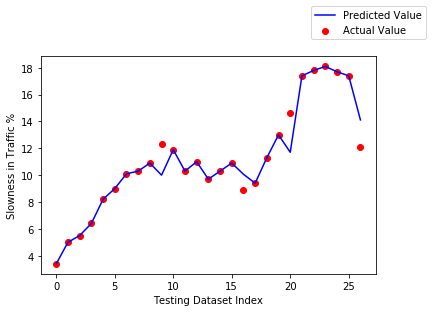

In [33]:
assume=[i for i in range(27)]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, z, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()

Decision Tree

In [34]:
regressor = DecisionTreeRegressor(random_state =1)
regressor.fit(xTrain, yTrain)

# Predicting a new result
y_pred = regressor.predict(xTest)

for i in range(27):
     print("○ Predicted Value: ","{0:.4f}".format(y_pred[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  4.0000 | Actual Value:  3.4000
○ Predicted Value:  5.0000 | Actual Value:  5.0000
○ Predicted Value:  5.9000 | Actual Value:  5.5000
○ Predicted Value:  5.3000 | Actual Value:  6.4000
○ Predicted Value:  9.8000 | Actual Value:  8.2000
○ Predicted Value:  7.0000 | Actual Value:  9.0000
○ Predicted Value:  10.8000 | Actual Value:  10.1000
○ Predicted Value:  6.2000 | Actual Value:  10.3000
○ Predicted Value:  6.2000 | Actual Value:  10.9000
○ Predicted Value:  7.7000 | Actual Value:  12.3000
○ Predicted Value:  6.2000 | Actual Value:  11.9000
○ Predicted Value:  8.5000 | Actual Value:  10.3000
○ Predicted Value:  6.3000 | Actual Value:  11.0000
○ Predicted Value:  6.3000 | Actual Value:  9.7000
○ Predicted Value:  11.4000 | Actual Value:  10.3000
○ Predicted Value:  6.8000 | Actual Value:  10.9000
○ Predicted Value:  10.6500 | Actual Value:  8.9000
○ Predicted Value:  5.1000 | Actual Value:  9.4000
○ Predicted Value:  6.7000 | Actual Value:  11.3000
○ Predicted Value:

In [35]:
error=0
for i in range(len(y_pred)):
    error+=pow(y_pred[i]-yTest[i],2)
error=error/27
print("○ MSE Error-->","{0:.4f}".format(error))

○ MSE Error--> 11.8359


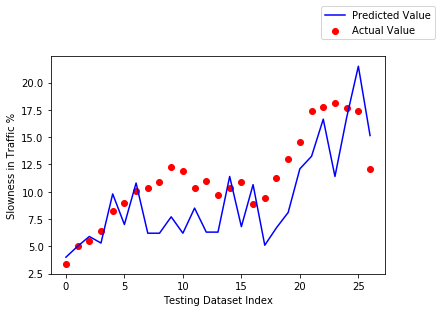

In [36]:
assume=[i for i in range(27)]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, y_pred, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()